In [244]:
import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

pd.set_option('display.max_columns', None)

In [260]:
# Выводит топ 5 лучших режиссеров по указанному параметру
def directors_list(category):
    
    matplotlib.rcParams.update({'font.size': 14})
    
    directors = list(df['Director'].unique())

    result = []
    
    for x in directors:
        data = {}
        data['name'] = x
        data['score'] = df.groupby([df['Director'] == x])[category].median()[1]
        data['films_count'] = df.groupby([df['Director'] == x])[category].count()[1]

        result.append(data)
    directors = pd.DataFrame.from_dict(result)
    return directors.sort_values(by='score', ascending=False).head()

In [262]:
# Строит график по лучшим 5 режиссерам по указанному параметру
def directors_chart(category):
    
    matplotlib.rcParams.update({'font.size': 14})
    
    directors = list(df['Director'].unique())

    result = []
    
    for x in directors:
        data = {}
        data['name'] = x
        data['score'] = df.groupby([df['Director'] == x])[category].median()[1]
        result.append(data)
    directors = pd.DataFrame.from_dict(result)
    directors = directors.sort_values(by='score', ascending=False)
    directors = directors.head()
    result = directors.plot.bar(x='name', y='score', rot=70, title=f"Лучшие режиссеры по медианному признаку {category}")
    plt.show(block=True)

In [288]:
# Проверяет гипотезу того, что, в среднем, фильмы определенного жанра снятые до указанного года имеют более высокую оценку, 
# чем фильмы, снятые после этого года
# Информация подается в текстовом виде и в виде графика
def genre_rating(year, genre):
    condition = df['Genre']
    action = (condition.str.contains(genre))
    df[action].head()
    
    print(f"Rating after {year}:", df[(action)&(df['Year']>year)]['Rating'].median()),
    print(f"Rating under {year}:", df[(action)&(df['Year']<year)]['Rating'].median()) 
    
    x = df[(action)&(df['Year']>year)]['Rating'].median()
    y = df[(action)&(df['Year']<year)]['Rating'].median()

    data = {'after_2010': x, 'under_2010':y}

    labels = data.keys()
    values = data.values()

    plt.bar(labels, values, color=['maroon', 'plum'])
    plt.title(f"Медианная оценка фильмов жанра {genre} до 2010 и после 2010 года")

    plt.show()

In [10]:
DATASET_PATH = 'C:/Users/Anar/OneDrive/Рабочий стол/datasets/IMDB-Movie-Data.csv'

In [108]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [14]:
# Показатели для предварительного понимания датасета
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


##### Проверка гипотезы того, что, в среднем, экшн фильмы снятые до 2010 года имеют более высокую оценку, чем фильмы, снятые после этого года

Rating after 2010: 6.6
Rating under 2010: 6.9


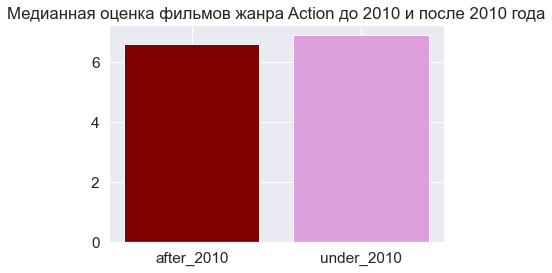

In [285]:
genre_rating(2010, 'Action')

##### Лучшие режиссеры по медианному рейтингу их фильмов и кассовости фильмов

In [261]:
directors_list('Rating')

,name,score,films_count
102,Nitesh Tiwari,8.8,1
86,Makoto Shinkai,8.6,1
200,Olivier Nakache,8.6,1
36,Christopher Nolan,8.6,5
345,Florian Henckel von Donnersmarck,8.5,1


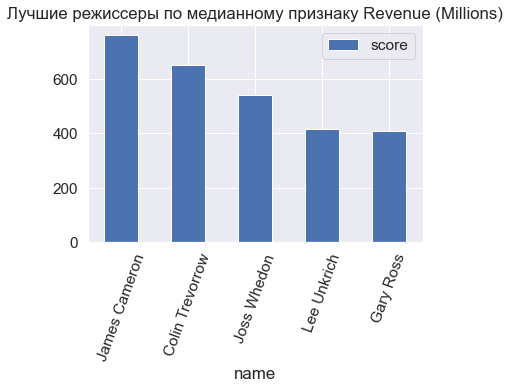

In [263]:
directors_chart('Revenue (Millions)')

##### Корреляция признаков. Можно отметить только не слишком сильную взаимосвязь между Revenue и Votes

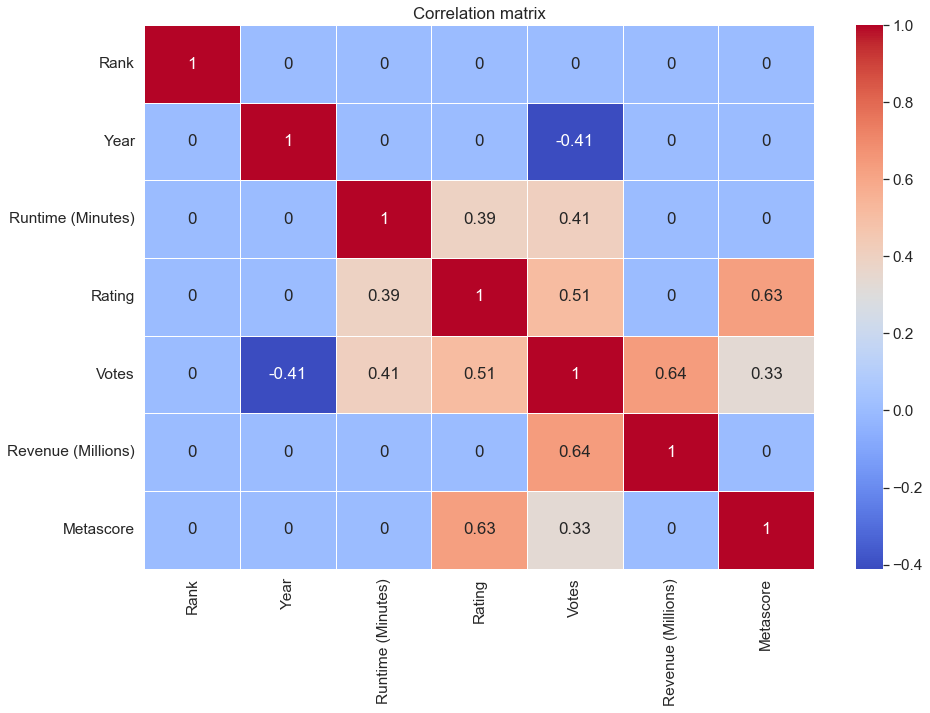

In [250]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()